In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-single network 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 3082.62it/s]


In [6]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [7]:
gpd.GeoDataFrame(edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('edges_0408.GPKG',driver='GPKG')

In [8]:
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [9]:
# delete 3 pairs useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [10]:
city_sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# gpd.GeoDataFrame(city_sub_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_sub_edges_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_stations[['osm_id', 'geometry','name']]).to_file('city_sub_stations_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_nodes[['geometry','degree','id']]).to_file('city_sub_nodes_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_routes[['osm_id', 'route', 'name', 'geometry']]).to_file('city_sub_routes_0329.GPKG',driver='GPKG')

In [13]:
# # 将DataFrame保存为pickle文件
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [14]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}

In [15]:
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [16]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [17]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [18]:
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [19]:
# # 将字典保存为pickle文件
# with open('city_sub_order_route_dict_0328.pkl', 'wb') as f:
#     pickle.dump(city_sub_order_route_dict, f)

In [20]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [21]:
# Create a graph representing the subway network using the extracted edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [22]:
# city_sub_all_shortest_paths_id_dict

In [23]:
# # output dictionary city_sub_all_shortest_paths_id_dict into pickle file
# with open('city_sub_all_shortest_paths_id_dict_0328.pkl', 'wb') as f:
#     pickle.dump(city_sub_all_shortest_paths_id_dict, f)

In [24]:
# # Calculate the shortest path pairs for each subway line
# city_sub_shortest_path_pairs = city_sub_order_id_pairs.copy()
# duplicate_row_count = city_sub_order_id_pairs.copy()
# city_sub_shortest_path_edges = city_sub_order_id_pairs.copy()
# city_sub_edges_dict = city_sub_order_id_pairs.copy()

# for line in city_sub_order_id_pairs.keys():
#     # Calculate all shortest paths for the current line using the subway network edges
#     city_sub_shortest_path_pairs[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_edges) 

#     # Count the duplicate rows, calculate the weighted edges for shortest paths,
#     # and update the subway network edges for the current line
#     duplicate_row_count[line], city_sub_shortest_path_edges[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs[line], city_sub_edges)
#     sub_edges = city_sub_edges_dict[line]
    
# # Plot all subway routes
# plot_routes(city_sub_routes, city_sub_edges, city_sub_shortest_path_edges)

In [25]:
# Get the keys of city_sub_all_shortest_paths_id_dict
routes = list(city_sub_all_shortest_paths_id_dict.keys())

# Collect all combinations of node IDs
collect_all = []
for route in routes:
    node_ids = city_sub_all_shortest_paths_id_dict[route]
    # Form pairs of consecutive node IDs
    collect_all.append(list(zip(node_ids, node_ids[1:] + node_ids[:1]))[:-1])

In [26]:
# collect_all

In [27]:
# Flatten the list of lists and make it unique
all_combinations = list(set(list(itertools.chain(*collect_all))))
# all_combinations

In [28]:
# Collect new order of edges and their indices
collect_new_order = []
collect_index = []

index = 0
for item in list(zip(city_sub_edges.from_id,city_sub_edges.to_id)):
    for ordered in all_combinations:
        # Check if the edge order matches any of the combinations
        if sorted(item) == sorted(ordered):
            if sum(item) == sum(ordered):
                collect_new_order.append(ordered)
                collect_index.append(index)
    index += 1

In [29]:
# collect_new_order

In [30]:
# collect_index

In [31]:
# Create DataFrame for new ordered edges
new_ordered_edges_from_to = pd.DataFrame(pd.Series(collect_new_order).tolist(), columns=['from_id_new','to_id_new'], index=collect_index)
# new_ordered_edges_from_to

In [32]:
# Merge new ordered edges with original edges
new_ordered_edges = new_ordered_edges_from_to.merge(city_sub_edges, left_index=True, right_index=True, how='outer')
new_ordered_edges

,from_id_new,to_id_new,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,1.0,0.0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,2.0,3.0,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,4.0,5.0,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,7.0,6.0,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,492.0,8.0,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,803.0,463.0,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,462.0,803.0,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,246.0,804.0,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
938,804.0,463.0,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [33]:
# duplicated_rows = new_ordered_edges[new_ordered_edges.index.duplicated(keep=False)]
# duplicated_rows

In [34]:
# new_ordered_edges.to_excel('new_ordered_edges.xlsx', header=True)

In [35]:
# Fill missing values with original values
new_ordered_edges.from_id_new = new_ordered_edges.from_id_new.fillna(new_ordered_edges.from_id)
new_ordered_edges.to_id_new = new_ordered_edges.to_id_new.fillna(new_ordered_edges.to_id)

# new_ordered_edges

In [36]:
# Convert columns to integer type
new_ordered_edges[['from_id_new', 'to_id_new','id','weights']] = new_ordered_edges[['from_id_new', 'to_id_new','id','weights']].astype(int)

new_ordered_edges = new_ordered_edges.drop(columns=['from_id', 'to_id','from_to','to_from'])
new_ordered_edges = new_ordered_edges.rename(columns={'from_id_new': 'from_id', 'to_id_new':'to_id'})


In [37]:
new_ordered_edges['from_to'] = [(from_id, to_id) for from_id, to_id in zip(new_ordered_edges['from_id'], new_ordered_edges['to_id'])]
new_ordered_edges['to_from'] = [(to_id, from_id) for to_id, from_id in zip(new_ordered_edges['to_id'], new_ordered_edges['from_id'])]

In [38]:
new_ordered_edges

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
0,1,0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,258.660599,0.010346,258,"(1, 0)","(0, 1)"
1,2,3,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,4,5,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,7,6,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,28.046592,0.001122,28,"(7, 6)","(6, 7)"
4,492,8,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,382.935219,0.015317,382,"(492, 8)","(8, 492)"
...,...,...,...,...,...,...,...,...,...,...,...,...
935,803,463,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,462,803,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,246,804,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,9.568874,0.000383,9,"(246, 804)","(804, 246)"
938,804,463,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,73.789113,0.002952,73,"(804, 463)","(463, 804)"


In [39]:
# Extract the edges from the input DataFrame and create a list of tuples with weights
od = new_ordered_edges[['from_id', 'to_id', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
edges_list

[(1, 0, {'weight': 258}),
 (2, 3, {'weight': 215}),
 (4, 5, {'weight': 121}),
 (7, 6, {'weight': 28}),
 (492, 8, {'weight': 382}),
 (6, 492, {'weight': 64}),
 (9, 10, {'weight': 257}),
 (11, 9, {'weight': 40}),
 (12, 13, {'weight': 61}),
 (14, 15, {'weight': 77}),
 (16, 17, {'weight': 58}),
 (18, 19, {'weight': 19}),
 (20, 18, {'weight': 100}),
 (21, 842, {'weight': 161}),
 (842, 22, {'weight': 222}),
 (23, 24, {'weight': 93}),
 (25, 23, {'weight': 59}),
 (26, 27, {'weight': 63}),
 (28, 29, {'weight': 48}),
 (30, 31, {'weight': 45}),
 (29, 807, {'weight': 40}),
 (807, 32, {'weight': 58}),
 (34, 33, {'weight': 88}),
 (36, 35, {'weight': 19}),
 (174, 37, {'weight': 46}),
 (33, 174, {'weight': 271}),
 (38, 39, {'weight': 235}),
 (40, 41, {'weight': 65}),
 (41, 42, {'weight': 215}),
 (43, 1, {'weight': 97}),
 (45, 44, {'weight': 10}),
 (46, 45, {'weight': 288}),
 (47, 48, {'weight': 95}),
 (49, 50, {'weight': 139}),
 (51, 52, {'weight': 76}),
 (53, 54, {'weight': 91}),
 (55, 53, {'weight':

In [40]:
# Extract the nodes from the input GeoDataFrame and create a list of node IDs
nodes_list = nodes.iloc[:,2].tolist()
nodes_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [41]:
G = nx.DiGraph()
for _, row in nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

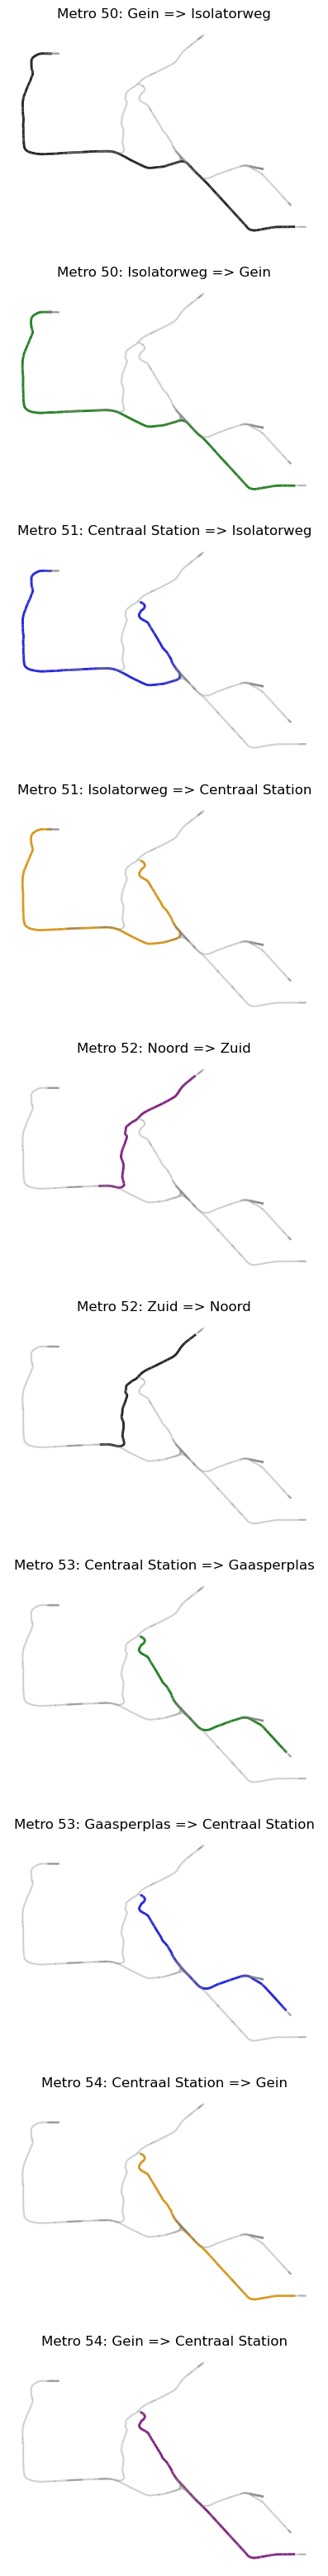

In [42]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges = city_sub_order_id_pairs.copy()
city_sub_edges = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], new_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges[line], city_sub_edges[line] = edges_with_count_weight(city_sub_shortest_path_pairs[line], new_ordered_edges)
    sub_edges = city_sub_edges[line]
    
# Plot all subway routes
plot_routes(city_sub_routes, new_ordered_edges, city_sub_shortest_path_edges)

In [43]:
# df50_1 = city_sub_shortest_path_edges['Metro 50: Gein => Isolatorweg']
# df50_2 = city_sub_shortest_path_edges['Metro 50: Isolatorweg => Gein']

# df51_1 = city_sub_shortest_path_edges['Metro 51: Centraal Station => Isolatorweg']
# df51_2 = city_sub_shortest_path_edges['Metro 51: Isolatorweg => Centraal Station']

# df52_1 = city_sub_shortest_path_edges['Metro 52: Noord => Zuid'] 
# df52_2 = city_sub_shortest_path_edges['Metro 52: Zuid => Noord']

# df53_1 = city_sub_shortest_path_edges['Metro 53: Centraal Station => Gaasperplas']
# df53_2 = city_sub_shortest_path_edges['Metro 53: Gaasperplas => Centraal Station']

# df54_1 = city_sub_shortest_path_edges['Metro 54: Centraal Station => Gein']
# df54_2 = city_sub_shortest_path_edges['Metro 54: Gein => Centraal Station']

In [44]:
# gpd.GeoDataFrame(df50_1[['osm_id', 'geometry','id']]).to_file('df50_1_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df50_2[['osm_id', 'geometry','id']]).to_file('df50_2_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df51_1[['osm_id', 'geometry','id']]).to_file('df51_1_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df51_2[['osm_id', 'geometry','id']]).to_file('df51_2_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df52_1[['osm_id', 'geometry','id']]).to_file('df52_1_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df52_2[['osm_id', 'geometry','id']]).to_file('df52_2_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df53_1[['osm_id', 'geometry','id']]).to_file('df53_1_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df53_2[['osm_id', 'geometry','id']]).to_file('df53_2_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df54_1[['osm_id', 'geometry','id']]).to_file('df54_1_0329.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df54_2[['osm_id', 'geometry','id']]).to_file('df54_2_0329.GPKG',driver='GPKG')

## Add columns to stations

In [45]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [46]:
city_sub_new_nodes = add_columns_to_nodes(city_sub_order_route_dict, nodes)

In [47]:
city_sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,POINT (4.97400 52.29564),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,POINT (4.96013 52.29813),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,POINT (4.95213 52.30687),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,POINT (4.94762 52.31181),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,POINT (4.94628 52.32683),2,829,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,POINT (4.93028 52.32974),2,827,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


In [48]:
city_sub_new_nodes[city_sub_new_nodes.name == 'Gein']

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
39,POINT (4.98930 52.29627),2,323,Gein,4.989299,52.296271,"(4.989299, 52.2962711)",Metro 50: Isolatorweg => Gein,subway,"50, 54","50, 54"


## Add columns to edges

In [49]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges, city_sub_routes)

In [50]:
city_sub_new_edges = add_columns_to_edges(city_sub_shortest_path_edges,new_ordered_edges)

In [51]:
column_to_drop = 'count_weight'
city_sub_new_edges = city_sub_new_edges.drop(columns=column_to_drop)

In [52]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",Metro 51: Isolatorweg => Centraal Station,subway,51
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",Metro 51: Isolatorweg => Centraal Station,subway,51


In [53]:
def count_commas(ref):
    # Check if the ',' character exists in the ref string
    if ',' in ref:
        # If it does, count the occurrences of ',' in the ref string
        comma_count = (ref.count(',')+1) * 9e5
        return comma_count
    else:
        # If ',' doesn't exist in the ref string, return 0
        return 9e5

In [54]:
city_sub_new_edges['ref'] = city_sub_new_edges['ref'].astype(str)
city_sub_new_edges['capacity'] = city_sub_new_edges['ref'].apply(count_commas)

In [55]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,route,ref,capacity
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",Metro 51: Isolatorweg => Centraal Station,subway,51,900000.0
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51",1800000.0
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",Metro 50: Isolatorweg => Gein,subway,"50, 51",1800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54",1800000.0
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54",1800000.0
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",Metro 51: Isolatorweg => Centraal Station,subway,51,900000.0
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",Metro 51: Isolatorweg => Centraal Station,subway,51,900000.0


# Test1:

## Define several source and sink nodes ----- Just use 6 pairs of start and end OD pairs

In [56]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    each_o_point = station_df.loc[[0]]
    origin_df = pd.concat([origin_df,each_o_point])

origin_df.drop_duplicates(subset='geometry', inplace=True)

selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)

In [57]:
origin_df

,geometry,name
0,POINT (4.9891612 52.2964067),Gein
1,POINT (4.8505967 52.3952329),Isolatorweg
2,POINT (4.9008686 52.3773546),Centraal Station
3,POINT (4.932402 52.4021571),Noord
4,POINT (4.8780248 52.3393025),Zuid
5,POINT (4.9842364 52.3115025),Gaasperplas


In [58]:
destination_df = pd.DataFrame()
each_d_point = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    each_d_point = station_df.loc[[station_df.index[-1]]]
    destination_df = pd.concat([destination_df,each_d_point])

destination_df.drop_duplicates(subset='geometry', inplace=True)

selected_columns = ['geometry','name']
destination_df = destination_df[selected_columns].reset_index(drop=True)

In [59]:
destination_df

,geometry,name
0,POINT (4.8505958 52.3951031),Isolatorweg
1,POINT (4.989299 52.2962711),Gein
2,POINT (4.9010471 52.3775081),Centraal Station
3,POINT (4.8772326 52.3393181),Zuid
4,POINT (4.932585 52.4020575),Noord
5,POINT (4.9843391 52.3111615),Gaasperplas


## Create demand for OD pairs using OD metrics

In [60]:
import random
def generate_random_list(length, total_sum):
    # Initialize a list of length with all elements being 1
    random_list = [1] * length
    # Randomly select a position from the list and add 1 to the element at that position
    for _ in range(total_sum - length):
        random_list[random.randint(0, length - 1)] += 1
    return random_list

In [61]:
sum_of_o_demand = 340000 

In [62]:
# o_demand_list = generate_random_list(len(origin_df), sum_of_o_demand)
# o_demand_list = [-x for x in o_demand_list]
# origin_df['demand'] = pd.DataFrame(o_demand_list)

In [63]:
origin_df

,geometry,name
0,POINT (4.9891612 52.2964067),Gein
1,POINT (4.8505967 52.3952329),Isolatorweg
2,POINT (4.9008686 52.3773546),Centraal Station
3,POINT (4.932402 52.4021571),Noord
4,POINT (4.8780248 52.3393025),Zuid
5,POINT (4.9842364 52.3115025),Gaasperplas


In [64]:
# Generate the matrix representing the equations
A = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 1, 0, 0, 0]])

# Loop until the demands meet the conditions
while True:
    # Generate random negative integer list for the demand column of origin_df
    o_demand_list = generate_random_list(len(origin_df), sum_of_o_demand)
    o_demand_list = [-x for x in o_demand_list]
    origin_df['demand'] = pd.DataFrame(o_demand_list)

    # Solve the system of equations
    b = np.array([np.abs(origin_df.iloc[i]['demand']) for i in range(len(origin_df))])
    print(b)
    x = np.linalg.solve(A, b)
    print(x)

    # If all demands in origin_df are negative integers and all demands in destination_df are positive integers, break the loop
    if all(x >= 0) and all(origin_df['demand'] <= 0):
        break

# Store the solution in the destination_df
destination_df['demand'] = x

[56750 56357 56348 56796 57157 56592]
[56750. 56357. 56592. 56796. 57157. 56348.]


In [65]:
origin_df

,geometry,name,demand
0,POINT (4.9891612 52.2964067),Gein,-56750
1,POINT (4.8505967 52.3952329),Isolatorweg,-56357
2,POINT (4.9008686 52.3773546),Centraal Station,-56348
3,POINT (4.932402 52.4021571),Noord,-56796
4,POINT (4.8780248 52.3393025),Zuid,-57157
5,POINT (4.9842364 52.3115025),Gaasperplas,-56592


In [66]:
destination_df

,geometry,name,demand
0,POINT (4.8505958 52.3951031),Isolatorweg,56750.0
1,POINT (4.989299 52.2962711),Gein,56357.0
2,POINT (4.9010471 52.3775081),Centraal Station,56592.0
3,POINT (4.8772326 52.3393181),Zuid,56796.0
4,POINT (4.932585 52.4020575),Noord,57157.0
5,POINT (4.9843391 52.3111615),Gaasperplas,56348.0


destination_df.iloc[0]['demand'] = np.abs(origin_df.iloc[0]['demand'])
destination_df.iloc[1]['demand'] = np.abs(origin_df.iloc[1]['demand'])
destination_df.iloc[5]['demand'] = np.abs(origin_df.iloc[2]['demand'])
destination_df.iloc[3]['demand'] = np.abs(origin_df.iloc[3]['demand'])
destination_df.iloc[4]['demand'] = np.abs(origin_df.iloc[4]['demand'])
destination_df.iloc[2]['demand'] = np.abs(origin_df.iloc[5]['demand'])

destination_df.iloc[0]['demand'] + destination_df.iloc[1]['demand'] + destination_df.iloc[2]['demand'] + destination_df.iloc[3]['demand'] +destination_df.iloc[4]['demand'] + destination_df.iloc[5]['demand'] = 340000
origin_df.iloc[0]['demand'] + origin_df.iloc[1]['demand'] + origin_df.iloc[2]['demand'] + origin_df.iloc[3]['demand'] +origin_df.iloc[4]['demand'] + origin_df.iloc[5]['demand'] = -340000
origin_df.iloc[0]['demand'] < 0
origin_df.iloc[1]['demand'] < 0
origin_df.iloc[2]['demand'] < 0
origin_df.iloc[3]['demand'] < 0
origin_df.iloc[4]['demand'] < 0
origin_df.iloc[5]['demand'] < 0
destination_df.iloc[0]['demand'] > 0
destination_df.iloc[1]['demand'] > 0
destination_df.iloc[2]['demand'] > 0
destination_df.iloc[3]['demand'] > 0
destination_df.iloc[4]['demand'] > 0
destination_df.iloc[5]['demand'] > 0


destination_df.iloc[0]['demand'] + destination_df.iloc[2]['demand'] = np.abs(origin_df.iloc[0]['demand'])
destination_df.iloc[1]['demand'] + destination_df.iloc[2]['demand'] = np.abs(origin_df.iloc[1]['demand'])
destination_df.iloc[0]['demand'] + destination_df.iloc[1]['demand'] + destination_df.iloc[5]['demand'] = np.abs(origin_df.iloc[2]['demand'])
destination_df.iloc[3]['demand'] = np.abs(origin_df.iloc[3]['demand'])
destination_df.iloc[4]['demand'] = np.abs(origin_df.iloc[4]['demand'])
destination_df.iloc[2]['demand'] = np.abs(origin_df.iloc[5]['demand'])

destination_df.iloc[0]['demand'] + destination_df.iloc[1]['demand'] + destination_df.iloc[2]['demand'] + destination_df.iloc[3]['demand'] +destination_df.iloc[4]['demand'] + destination_df.iloc[5]['demand'] = 340000
origin_df.iloc[0]['demand'] + origin_df.iloc[1]['demand'] + origin_df.iloc[2]['demand'] + origin_df.iloc[3]['demand'] +origin_df.iloc[4]['demand'] + origin_df.iloc[5]['demand'] = -340000
origin_df.iloc[0]['demand'] < 0
origin_df.iloc[1]['demand'] < 0
origin_df.iloc[2]['demand'] < 0
origin_df.iloc[3]['demand'] < 0
origin_df.iloc[4]['demand'] < 0
origin_df.iloc[5]['demand'] < 0
destination_df.iloc[0]['demand'] > 0
destination_df.iloc[1]['demand'] > 0
destination_df.iloc[2]['demand'] > 0
destination_df.iloc[3]['demand'] > 0
destination_df.iloc[4]['demand'] > 0
destination_df.iloc[5]['demand'] > 0


In [67]:
OD_demand_df = pd.concat([origin_df,destination_df]).reset_index(drop=True)

In [68]:
OD_demand_df = OD_demand_df[['geometry','demand']]
OD_demand_df

,geometry,demand
0,POINT (4.9891612 52.2964067),-56750.0
1,POINT (4.8505967 52.3952329),-56357.0
2,POINT (4.9008686 52.3773546),-56348.0
3,POINT (4.932402 52.4021571),-56796.0
4,POINT (4.8780248 52.3393025),-57157.0
5,POINT (4.9842364 52.3115025),-56592.0
6,POINT (4.8505958 52.3951031),56750.0
7,POINT (4.989299 52.2962711),56357.0
8,POINT (4.9010471 52.3775081),56592.0
9,POINT (4.8772326 52.3393181),56796.0


In [69]:
sum(OD_demand_df.demand)

0.0

In [70]:
OD_demand_df = pd.merge(nodes,OD_demand_df, on = 'geometry', how = 'outer')
OD_demand_df

,geometry,degree,id,demand
0,POINT (4.9236699 52.3361909),2,0,NaN
1,POINT (4.9232197 52.3339159),2,1,NaN
2,POINT (4.9642294 52.2945339),2,2,NaN
3,POINT (4.9673168 52.2943931),2,3,NaN
4,POINT (4.9622901 52.2955678),2,4,NaN
...,...,...,...,...
863,POINT (4.8906476 52.3539585),2,863,NaN
864,POINT (4.8906487 52.3539577),2,864,NaN
865,POINT (4.8927726 52.3704434),2,865,NaN
866,POINT (4.9010846 52.371353),2,866,NaN


In [71]:
OD_demand_df['demand'] = OD_demand_df['demand'].fillna(0).astype(float)    

In [72]:
OD_demand_df

,geometry,degree,id,demand
0,POINT (4.9236699 52.3361909),2,0,0.0
1,POINT (4.9232197 52.3339159),2,1,0.0
2,POINT (4.9642294 52.2945339),2,2,0.0
3,POINT (4.9673168 52.2943931),2,3,0.0
4,POINT (4.9622901 52.2955678),2,4,0.0
...,...,...,...,...
863,POINT (4.8906476 52.3539585),2,863,0.0
864,POINT (4.8906487 52.3539577),2,864,0.0
865,POINT (4.8927726 52.3704434),2,865,0.0
866,POINT (4.9010846 52.371353),2,866,0.0


## Build DiGraph with nodes information from OD_demand_df and edges information from city_sub_edges_for_OD--city_sub_shortest_path_edges

In [72]:
G1 = nx.DiGraph()
for node_id, row in OD_demand_df.iterrows():
    geometry = row['geometry']
    x,y = geometry.x, geometry.y
    demand = row['demand']
    G1.add_node(node_id, pos = (x,y), demand = demand)

In [73]:
city_sub_edges_for_OD = pd.DataFrame()
city_sub_edges_for_OD = pd.concat(city_sub_shortest_path_edges.values(), ignore_index=True)

city_sub_edges_for_OD.drop_duplicates(subset='geometry', inplace = True)
city_sub_edges_for_OD

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from,count_weight,route_name_list,ref,route
0,634,317,166187911,"LINESTRING (4.9823107 52.2963387, 4.9838859 52...",subway,None,358,107.447350,0.004298,107,"(634, 317)","(317, 634)",1.0,Metro 50: Gein => Isolatorweg,50,subway
1,318,634,166187911,"LINESTRING (4.9838859 52.2963361, 4.9847396 52...",subway,None,359,58.234342,0.002329,58,"(318, 634)","(634, 318)",1.0,Metro 50: Gein => Isolatorweg,50,subway
2,321,318,166187913,"LINESTRING (4.9847396 52.2963405, 4.9850507 52...",subway,None,361,21.221392,0.000849,21,"(321, 318)","(318, 321)",1.0,Metro 50: Gein => Isolatorweg,50,subway
3,654,321,166187917,"LINESTRING (4.9850507 52.2963421, 4.9856334 52...",subway,None,366,140.268473,0.005611,140,"(654, 321)","(321, 654)",1.0,Metro 50: Gein => Isolatorweg,50,subway
4,328,654,166187917,"LINESTRING (4.9871059 52.2963808, 4.9873266 52...",subway,None,367,140.227871,0.005609,140,"(328, 654)","(654, 328)",1.0,Metro 50: Gein => Isolatorweg,50,subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,686,268,404149598,"LINESTRING (4.9266581 52.3339117, 4.9265012 52...",subway,None,736,21.910835,0.000876,21,"(686, 268)","(268, 686)",1.0,Metro 54: Gein => Centraal Station,54,subway
1044,275,696,503528039,"LINESTRING (4.927832 52.3326299, 4.926833 52.3...",subway,None,756,139.091384,0.005564,139,"(275, 696)","(696, 275)",1.0,Metro 54: Gein => Centraal Station,54,subway
1045,696,686,503528040,"LINESTRING (4.926833 52.3337201, 4.9266581 52....",subway,None,757,24.422507,0.000977,24,"(696, 686)","(686, 696)",1.0,Metro 54: Gein => Centraal Station,54,subway
1046,791,461,1061085936,"LINESTRING (4.9224194 52.338548, 4.9221852 52....",subway,None,933,112.198612,0.004488,112,"(791, 461)","(461, 791)",1.0,Metro 54: Gein => Centraal Station,54,subway


In [74]:
def count_commas(ref):
    # Check if the ',' character exists in the ref string
    if ',' in ref:
        # If it does, count the occurrences of ',' in the ref string
        comma_count = (ref.count(',')+1) * 9e5
        return comma_count
    else:
        # If ',' doesn't exist in the ref string, return 0
        return 9e5

In [75]:
city_sub_edges_for_OD['ref'] = city_sub_edges_for_OD['ref'].astype(str)
city_sub_edges_for_OD['capacity'] = city_sub_edges_for_OD['ref'].apply(count_commas)

In [76]:
edges_for_G1 = city_sub_edges_for_OD[['from_id', 'to_id', 'time', 'weights','capacity']]
edges_for_G1['time'] = edges_for_G1['time']
edges_for_G1['weights'] = edges_for_G1['weights']
edges_for_G1['capacity'] = edges_for_G1['capacity']

In [77]:
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight,capacity = capacity)

## Calculate min_cost_flow and min_cost_flow_cost

In [78]:
minFlowDict = nx.min_cost_flow(G1) 

In [79]:
minFlowDict

{0: {242: 0.0},
 1: {0: 0.0},
 2: {3: 57224.0},
 3: {340: 57224.0},
 4: {5: 57224.0},
 5: {2: 57224.0},
 6: {492: 57224.0},
 7: {6: 57224.0},
 8: {123: 57224.0},
 9: {10: 56669.0},
 10: {604: 56669.0},
 11: {9: 56669.0},
 12: {13: 57224.0},
 13: {570: 57224.0},
 14: {15: 56669.0},
 15: {585: 56669.0},
 16: {17: 56669.0},
 17: {14: 56669.0},
 18: {19: 56669.0},
 19: {111: 56669.0},
 20: {18: 56669.0},
 21: {842: 57224.0},
 22: {106: 57224.0},
 23: {24: 57224.0},
 24: {109: 57224.0},
 25: {23: 57224.0},
 26: {27: 56669.0},
 27: {846: 56669.0},
 28: {29: 57224.0},
 29: {807: 57224.0},
 30: {31: 57224.0},
 31: {86: 57224.0},
 32: {30: 57224.0},
 33: {174: 57224.0},
 34: {33: 57224.0},
 35: {84: 57224.0},
 36: {35: 57224.0},
 37: {36: 57224.0},
 38: {39: 56669.0},
 39: {155: 56669.0},
 40: {41: 57224.0},
 41: {42: 57224.0},
 42: {83: 57224.0},
 43: {1: 0.0},
 44: {227: 56669.0},
 45: {44: 56669.0},
 46: {45: 56669.0},
 47: {48: 56396.0},
 48: {141: 56396.0},
 49: {50: 56396.0},
 50: {191: 5

In [80]:
flowCost = nx.min_cost_flow_cost(G1)

In [81]:
flowCost

4561743822.0

In [82]:
edgeCapacity = nx.get_edge_attributes(G1, 'weight')
edgeLabel = {}  # 边的标签
for i in edgeCapacity.keys():  # 整理边的标签，用于绘图显示
    edgeLabel[i] = f'w={edgeCapacity[i]:}'  # 边的容量
edgeLists = []
for i in minFlowDict.keys():
    for j in minFlowDict[i].keys():
        edgeLabel[(i,j)] += ',f=' + str(minFlowDict[i][j])  # 取出每条边流量信息存入边显示值
        if minFlowDict[i][j] > 0:
            edgeLists.append((i, j))

In [83]:
edgeLists

[(2, 3),
 (3, 340),
 (4, 5),
 (5, 2),
 (6, 492),
 (7, 6),
 (8, 123),
 (9, 10),
 (10, 604),
 (11, 9),
 (12, 13),
 (13, 570),
 (14, 15),
 (15, 585),
 (16, 17),
 (17, 14),
 (18, 19),
 (19, 111),
 (20, 18),
 (21, 842),
 (22, 106),
 (23, 24),
 (24, 109),
 (25, 23),
 (26, 27),
 (27, 846),
 (28, 29),
 (29, 807),
 (30, 31),
 (31, 86),
 (32, 30),
 (33, 174),
 (34, 33),
 (35, 84),
 (36, 35),
 (37, 36),
 (38, 39),
 (39, 155),
 (40, 41),
 (41, 42),
 (42, 83),
 (44, 227),
 (45, 44),
 (46, 45),
 (47, 48),
 (48, 141),
 (49, 50),
 (50, 191),
 (51, 52),
 (52, 389),
 (53, 54),
 (54, 146),
 (55, 53),
 (56, 812),
 (57, 60),
 (58, 556),
 (59, 480),
 (60, 503),
 (63, 61),
 (64, 852),
 (65, 509),
 (79, 805),
 (81, 99),
 (82, 835),
 (83, 370),
 (84, 834),
 (85, 167),
 (86, 94),
 (87, 88),
 (88, 89),
 (89, 90),
 (90, 100),
 (91, 92),
 (92, 457),
 (93, 91),
 (94, 93),
 (95, 40),
 (96, 162),
 (98, 82),
 (99, 164),
 (100, 101),
 (101, 102),
 (102, 103),
 (103, 841),
 (104, 105),
 (105, 587),
 (106, 107),
 (107, 1

In [84]:
min_cost_edges_id_df = pd.DataFrame(zip(edgeLists))
min_cost_edges_id_df = min_cost_edges_id_df.rename(columns={0: 'from_to'})
min_cost_edges_id_df

,from_to
0,"(2, 3)"
1,"(3, 340)"
2,"(4, 5)"
3,"(5, 2)"
4,"(6, 492)"
...,...
612,"(863, 752)"
613,"(864, 754)"
614,"(865, 747)"
615,"(866, 732)"


In [85]:
min_cost_edges_df = pd.merge(min_cost_edges_id_df,city_sub_new_edges,on='from_to',how='left')
min_cost_edges_df

,from_to,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,route_name_list,route,ref,capacity
0,"(2, 3)",23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
1,"(3, 340)",181902170,"LINESTRING (4.9673168 52.2943931, 4.9676649 52...",subway,None,492,3,340,130.325014,0.005213,130,"(340, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
2,"(4, 5)",23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
3,"(5, 2)",504584792,"LINESTRING (4.9635185 52.2947851, 4.9636127 52...",subway,None,778,5,2,56.029685,0.002241,56,"(2, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
4,"(6, 492)",23189039,"LINESTRING (4.8457805 52.395217, 4.8467318 52....",subway,None,5,6,492,64.744169,0.002590,64,"(492, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51",1800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,"(863, 752)",691060902,"LINESTRING (4.8906476 52.3539585, 4.8910802 52...",subway,None,868,863,752,124.329604,0.004973,124,"(752, 863)",Metro 52: Noord => Zuid,subway,52,900000.0
613,"(864, 754)",691060904,"LINESTRING (4.8906487 52.3539577, 4.8905141 52...",subway,None,870,864,754,89.135514,0.003565,89,"(754, 864)",Metro 52: Zuid => Noord,subway,52,900000.0
614,"(865, 747)",691058994,"LINESTRING (4.8927726 52.3704434, 4.8928159 52...",subway,None,860,865,747,105.458640,0.004218,105,"(747, 865)",Metro 52: Zuid => Noord,subway,52,900000.0
615,"(866, 732)",562757374,"LINESTRING (4.9032664 52.3738373, 4.9032513 52...",subway,None,832,866,732,315.995940,0.012640,315,"(732, 866)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",2700000.0


In [86]:
gpd.GeoDataFrame(min_cost_edges_df[['osm_id','geometry','id','from_id','to_id','weights','ref','capacity']]).to_file('min_cost_edges_df_0408.GPKG',driver='GPKG')

## Build DiGraph with nodes information from OD_demand_df and edges information from city_sub_new_edges

In [73]:
G1 = nx.DiGraph()
for node_id, row in OD_demand_df.iterrows():
    geometry = row['geometry']
    x,y = geometry.x, geometry.y
    demand = row['demand']
    G1.add_node(node_id, pos = (x,y), demand = demand)

In [74]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,route,ref,capacity
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",Metro 51: Isolatorweg => Centraal Station,subway,51,900000.0
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51",1800000.0
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",Metro 50: Isolatorweg => Gein,subway,"50, 51",1800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54",1800000.0
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",Metro 53: Gaasperplas => Centraal Station,subway,"53, 54",1800000.0
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",Metro 51: Isolatorweg => Centraal Station,subway,51,900000.0
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",Metro 51: Isolatorweg => Centraal Station,subway,51,900000.0


In [75]:
edges_for_G1 = city_sub_new_edges[['from_id', 'to_id', 'time', 'weights','capacity']]
edges_for_G1['time'] = edges_for_G1['time']
edges_for_G1['weights'] = edges_for_G1['weights']
edges_for_G1['capacity'] = edges_for_G1['capacity']

In [76]:
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight,capacity = capacity)

## Calculate min_cost_flow and min_cost_flow_cost

In [77]:
minFlowDict = nx.min_cost_flow(G1) 

In [78]:
minFlowDict

{0: {242: 0.0},
 1: {0: 0.0},
 2: {3: 56357.0},
 3: {340: 56357.0},
 4: {5: 56357.0},
 5: {2: 56357.0},
 6: {492: 56357.0},
 7: {6: 56357.0},
 8: {123: 56357.0},
 9: {10: 393.0},
 10: {604: 393.0},
 11: {9: 393.0},
 12: {13: 0.0},
 13: {570: 0.0},
 14: {15: 393.0},
 15: {585: 393.0},
 16: {17: 393.0},
 17: {14: 393.0},
 18: {19: 393.0},
 19: {111: 393.0},
 20: {18: 393.0},
 21: {842: 0.0},
 22: {106: 0.0},
 23: {24: 0.0},
 24: {109: 0.0},
 25: {23: 0.0},
 26: {27: 393.0},
 27: {846: 393.0},
 28: {29: 0.0},
 29: {807: 0.0},
 30: {31: 0.0},
 31: {86: 0.0},
 32: {30: 0.0},
 33: {174: 0.0},
 34: {33: 0.0},
 35: {84: 0.0},
 36: {35: 0.0},
 37: {36: 0.0},
 38: {39: 393.0},
 39: {155: 393.0},
 40: {41: 0.0},
 41: {42: 0.0},
 42: {83: 0.0},
 43: {1: 0.0},
 44: {227: 393.0},
 45: {44: 393.0},
 46: {45: 393.0},
 47: {48: 0.0},
 48: {141: 0.0},
 49: {50: 0.0},
 50: {191: 0.0},
 51: {52: 0.0},
 52: {394: 0.0, 389: 0},
 53: {54: 0},
 54: {146: 0},
 55: {53: 0},
 56: {812: 0.0},
 57: {60: 0.0},
 58:

In [79]:
flowCost = nx.min_cost_flow_cost(G1)

In [80]:
flowCost

1210862435.0

In [81]:
edgeCapacity = nx.get_edge_attributes(G1, 'weight')
edgeLabel = {}  # 边的标签
for i in edgeCapacity.keys():  # 整理边的标签，用于绘图显示
    edgeLabel[i] = f'w={edgeCapacity[i]:}'  # 边的容量
edgeLists = []
for i in minFlowDict.keys():
    for j in minFlowDict[i].keys():
        edgeLabel[(i,j)] += ',f=' + str(minFlowDict[i][j])  # 取出每条边流量信息存入边显示值
        if minFlowDict[i][j] > 0:
            edgeLists.append((i, j))

In [82]:
edgeLists

[(2, 3),
 (3, 340),
 (4, 5),
 (5, 2),
 (6, 492),
 (7, 6),
 (8, 123),
 (9, 10),
 (10, 604),
 (11, 9),
 (14, 15),
 (15, 585),
 (16, 17),
 (17, 14),
 (18, 19),
 (19, 111),
 (20, 18),
 (26, 27),
 (27, 846),
 (38, 39),
 (39, 155),
 (44, 227),
 (45, 44),
 (46, 45),
 (59, 480),
 (63, 61),
 (64, 852),
 (79, 805),
 (81, 99),
 (82, 835),
 (87, 88),
 (88, 89),
 (89, 90),
 (90, 100),
 (98, 82),
 (99, 164),
 (100, 101),
 (101, 102),
 (102, 103),
 (103, 841),
 (104, 105),
 (105, 587),
 (110, 848),
 (111, 843),
 (112, 578),
 (113, 114),
 (114, 115),
 (115, 110),
 (118, 119),
 (119, 844),
 (120, 121),
 (121, 372),
 (122, 849),
 (123, 122),
 (127, 347),
 (128, 127),
 (129, 838),
 (130, 129),
 (131, 130),
 (135, 499),
 (137, 866),
 (138, 678),
 (139, 656),
 (140, 139),
 (142, 412),
 (143, 810),
 (144, 145),
 (145, 425),
 (148, 405),
 (149, 148),
 (152, 87),
 (153, 458),
 (154, 175),
 (155, 154),
 (160, 98),
 (164, 166),
 (166, 160),
 (172, 641),
 (173, 631),
 (175, 153),
 (176, 177),
 (177, 465),
 (182,

In [83]:
min_cost_edges_id_df = pd.DataFrame(zip(edgeLists))
min_cost_edges_id_df = min_cost_edges_id_df.rename(columns={0: 'from_to'})
min_cost_edges_id_df

,from_to
0,"(2, 3)"
1,"(3, 340)"
2,"(4, 5)"
3,"(5, 2)"
4,"(6, 492)"
...,...
387,"(862, 766)"
388,"(863, 752)"
389,"(864, 754)"
390,"(865, 747)"


In [84]:
min_cost_edges_df = pd.merge(min_cost_edges_id_df,city_sub_new_edges,on='from_to',how='left')
min_cost_edges_df

,from_to,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,route_name_list,route,ref,capacity
0,"(2, 3)",23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
1,"(3, 340)",181902170,"LINESTRING (4.9673168 52.2943931, 4.9676649 52...",subway,None,492,3,340,130.325014,0.005213,130,"(340, 3)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
2,"(4, 5)",23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
3,"(5, 2)",504584792,"LINESTRING (4.9635185 52.2947851, 4.9636127 52...",subway,None,778,5,2,56.029685,0.002241,56,"(2, 5)",Metro 50: Isolatorweg => Gein,subway,"50, 54",1800000.0
4,"(6, 492)",23189039,"LINESTRING (4.8457805 52.395217, 4.8467318 52....",subway,None,5,6,492,64.744169,0.002590,64,"(492, 6)",Metro 50: Isolatorweg => Gein,subway,"50, 51",1800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,"(862, 766)",691060920,"LINESTRING (4.8912207 52.3606661, 4.8912395 52...",subway,None,884,862,766,77.617017,0.003105,77,"(766, 862)",Metro 52: Zuid => Noord,subway,52,900000.0
388,"(863, 752)",691060902,"LINESTRING (4.8906476 52.3539585, 4.8910802 52...",subway,None,868,863,752,124.329604,0.004973,124,"(752, 863)",Metro 52: Noord => Zuid,subway,52,900000.0
389,"(864, 754)",691060904,"LINESTRING (4.8906487 52.3539577, 4.8905141 52...",subway,None,870,864,754,89.135514,0.003565,89,"(754, 864)",Metro 52: Zuid => Noord,subway,52,900000.0
390,"(865, 747)",691058994,"LINESTRING (4.8927726 52.3704434, 4.8928159 52...",subway,None,860,865,747,105.458640,0.004218,105,"(747, 865)",Metro 52: Zuid => Noord,subway,52,900000.0


In [85]:
gpd.GeoDataFrame(min_cost_edges_df[['osm_id','geometry','id','from_id','to_id','weights','ref','capacity']]).to_file('min_cost_edges_df_0408.GPKG',driver='GPKG')

# Define several source and sink nodes with demand---1----- Using an extra RAI as both origin and destination node

city_sub_order_route_dict

In [56]:
# 将两个方向的同一站都保存成origin station的情况--与目前20240314的test_OD_metro冲突,暂不考虑,先保留在这--新函数可以运行这个,但是绘图结果太多不能上传git hub,所以写了一个新的test_OD_metro_new_dict,可以只输出路线结果,需要绘图再根据路线结果绘图
origin_df = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    first_row = station_df.iloc[0]
    last_row = station_df.iloc[-1]
    each_o_point = pd.DataFrame([first_row, last_row])
    origin_df = pd.concat([origin_df,each_o_point])

origin_df.drop_duplicates(subset='geometry', inplace=True)

selected_columns = ['geometry','geo_x','geo_y','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_df 

,geometry,geo_x,geo_y,name
0,POINT (4.9891612 52.2964067),4.989161,52.296407,Gein
1,POINT (4.8505958 52.3951031),4.850596,52.395103,Isolatorweg
2,POINT (4.8505967 52.3952329),4.850597,52.395233,Isolatorweg
3,POINT (4.989299 52.2962711),4.989299,52.296271,Gein
4,POINT (4.9008686 52.3773546),4.900869,52.377355,Centraal Station
5,POINT (4.9010471 52.3775081),4.901047,52.377508,Centraal Station
6,POINT (4.932402 52.4021571),4.932402,52.402157,Noord
7,POINT (4.8772326 52.3393181),4.877233,52.339318,Zuid
8,POINT (4.8780248 52.3393025),4.878025,52.339303,Zuid
9,POINT (4.932585 52.4020575),4.932585,52.402057,Noord


In [57]:
# Using all other stations as destination nodes
origin_name_df = origin_df[['name']]
destination_df = pd.DataFrame()
each_route_destination_df = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    merged_df = pd.merge(station_df, origin_name_df, on='name', how='left', indicator=True)
    each_route_destination_df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1).reset_index(drop=True)
    destination_df = pd.concat([destination_df, each_route_destination_df])
    
destination_df.drop_duplicates(subset='geometry', inplace=True)
destination_df = destination_df.reset_index(drop=True)
destination_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
0,18,Reigersbos,POINT (4.9740002 52.2956365),4.974,52.295637,Metro 50: Gein => Isolatorweg,50,subway,"(4.9740002, 52.2956365)"
1,17,Holendrecht,POINT (4.9601264 52.2981319),4.960126,52.298132,Metro 50: Gein => Isolatorweg,50,subway,"(4.9601264, 52.2981319)"
2,6,Bullewijk,POINT (4.9521292 52.306869),4.952129,52.306869,Metro 50: Gein => Isolatorweg,50,subway,"(4.9521292, 52.306869)"
3,4,Bijlmer ArenA,POINT (4.9476178 52.311806),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)"
4,3,Strandvliet,POINT (4.9413977 52.3186119),4.941398,52.318612,Metro 50: Gein => Isolatorweg,50,subway,"(4.9413977, 52.3186119)"
...,...,...,...,...,...,...,...,...,...
66,7,Verrijn Stuartweg,POINT (4.9673352 52.3283668),4.967335,52.328367,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9673352, 52.3283668)"
67,6,Station Diemen Zuid,POINT (4.9566878 52.3304057),4.956688,52.330406,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9566878, 52.3304057)"
68,9,Venserpolder,POINT (4.9462773 52.3268326),4.946277,52.326833,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9462773, 52.3268326)"
69,8,Van der Madeweg,POINT (4.9302846 52.3297352),4.930285,52.329735,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9302846, 52.3297352)"


In [58]:
import random
def generate_random_list(length, total_sum):
    # Initialize a list of length with all elements being 1
    random_list = [1] * length
    # Randomly select a position from the list and add 1 to the element at that position
    for _ in range(total_sum - length):
        random_list[random.randint(0, length - 1)] += 1
    return random_list

In [59]:
sum_of_o_demand = 340000 

In [60]:
o_demand_list = generate_random_list(len(origin_df), sum_of_o_demand)
o_demand_list = [-x for x in o_demand_list]
o_demand_list

[-28073,
 -28288,
 -28555,
 -28338,
 -28454,
 -28423,
 -28427,
 -28268,
 -28174,
 -28351,
 -28169,
 -28480]

In [61]:
origin_df['demand'] = pd.DataFrame(o_demand_list)
origin_df

,geometry,geo_x,geo_y,name,demand
0,POINT (4.9891612 52.2964067),4.989161,52.296407,Gein,-28073
1,POINT (4.8505958 52.3951031),4.850596,52.395103,Isolatorweg,-28288
2,POINT (4.8505967 52.3952329),4.850597,52.395233,Isolatorweg,-28555
3,POINT (4.989299 52.2962711),4.989299,52.296271,Gein,-28338
4,POINT (4.9008686 52.3773546),4.900869,52.377355,Centraal Station,-28454
5,POINT (4.9010471 52.3775081),4.901047,52.377508,Centraal Station,-28423
6,POINT (4.932402 52.4021571),4.932402,52.402157,Noord,-28427
7,POINT (4.8772326 52.3393181),4.877233,52.339318,Zuid,-28268
8,POINT (4.8780248 52.3393025),4.878025,52.339303,Zuid,-28174
9,POINT (4.932585 52.4020575),4.932585,52.402057,Noord,-28351


In [62]:
d_demand_list = generate_random_list(len(destination_df), sum_of_o_demand)
d_demand_list

[4896,
 4842,
 4819,
 4823,
 4814,
 4853,
 4744,
 4695,
 4798,
 4792,
 4747,
 4852,
 4758,
 4737,
 4683,
 4937,
 4645,
 4632,
 4803,
 4779,
 4724,
 4891,
 4744,
 4753,
 4805,
 4775,
 4690,
 4897,
 4853,
 4635,
 4747,
 4816,
 4900,
 4840,
 4813,
 4771,
 4860,
 4663,
 4793,
 4913,
 4843,
 4789,
 4769,
 4634,
 4799,
 4886,
 4799,
 4815,
 4833,
 4861,
 4735,
 4728,
 4847,
 4732,
 4688,
 4832,
 4840,
 4596,
 4822,
 4802,
 4730,
 4775,
 4794,
 4856,
 4696,
 4838,
 4765,
 4835,
 4878,
 4887,
 4764]

In [63]:
destination_df['demand'] = pd.DataFrame(d_demand_list)
destination_df = destination_df[['geometry', 'geo_x', 'geo_y', 'name', 'demand']]
destination_df

,geometry,geo_x,geo_y,name,demand
0,POINT (4.9740002 52.2956365),4.974,52.295637,Reigersbos,4896
1,POINT (4.9601264 52.2981319),4.960126,52.298132,Holendrecht,4842
2,POINT (4.9521292 52.306869),4.952129,52.306869,Bullewijk,4819
3,POINT (4.9476178 52.311806),4.947618,52.311806,Bijlmer ArenA,4823
4,POINT (4.9413977 52.3186119),4.941398,52.318612,Strandvliet,4814
...,...,...,...,...,...
66,POINT (4.9673352 52.3283668),4.967335,52.328367,Verrijn Stuartweg,4765
67,POINT (4.9566878 52.3304057),4.956688,52.330406,Station Diemen Zuid,4835
68,POINT (4.9462773 52.3268326),4.946277,52.326833,Venserpolder,4878
69,POINT (4.9302846 52.3297352),4.930285,52.329735,Van der Madeweg,4887


In [64]:
OD_demand_df = pd.concat([origin_df,destination_df]).reset_index(drop=True)

In [65]:
OD_demand_df

,geometry,geo_x,geo_y,name,demand
0,POINT (4.9891612 52.2964067),4.989161,52.296407,Gein,-28073
1,POINT (4.8505958 52.3951031),4.850596,52.395103,Isolatorweg,-28288
2,POINT (4.8505967 52.3952329),4.850597,52.395233,Isolatorweg,-28555
3,POINT (4.989299 52.2962711),4.989299,52.296271,Gein,-28338
4,POINT (4.9008686 52.3773546),4.900869,52.377355,Centraal Station,-28454
...,...,...,...,...,...
78,POINT (4.9673352 52.3283668),4.967335,52.328367,Verrijn Stuartweg,4765
79,POINT (4.9566878 52.3304057),4.956688,52.330406,Station Diemen Zuid,4835
80,POINT (4.9462773 52.3268326),4.946277,52.326833,Venserpolder,4878
81,POINT (4.9302846 52.3297352),4.930285,52.329735,Van der Madeweg,4887


In [66]:
OD_demand_df = pd.merge(nodes,OD_demand_df, on = 'geometry', how = 'outer')
OD_demand_df

,geometry,degree,id,geo_x,geo_y,name,demand
0,POINT (4.9236699 52.3361909),2,0,NaN,NaN,NaN,NaN
1,POINT (4.9232197 52.3339159),2,1,NaN,NaN,NaN,NaN
2,POINT (4.9642294 52.2945339),2,2,NaN,NaN,NaN,NaN
3,POINT (4.9673168 52.2943931),2,3,NaN,NaN,NaN,NaN
4,POINT (4.9622901 52.2955678),2,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
863,POINT (4.8906476 52.3539585),2,863,4.890648,52.353958,De Pijp,4735.0
864,POINT (4.8906487 52.3539577),2,864,4.890649,52.353958,De Pijp,4732.0
865,POINT (4.8927726 52.3704434),2,865,4.892773,52.370443,Rokin,4832.0
866,POINT (4.9010846 52.371353),2,866,4.901085,52.371353,Nieuwmarkt,4799.0


In [67]:
for index, row in OD_demand_df.iterrows():
    row['geo_x'] = row['geometry'].x
    row['geo_y'] = row['geometry'].y
OD_demand_df['demand'] = OD_demand_df['demand'].fillna(0).astype(float)    

In [68]:
OD_demand_df

,geometry,degree,id,geo_x,geo_y,name,demand
0,POINT (4.9236699 52.3361909),2,0,NaN,NaN,NaN,0.0
1,POINT (4.9232197 52.3339159),2,1,NaN,NaN,NaN,0.0
2,POINT (4.9642294 52.2945339),2,2,NaN,NaN,NaN,0.0
3,POINT (4.9673168 52.2943931),2,3,NaN,NaN,NaN,0.0
4,POINT (4.9622901 52.2955678),2,4,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
863,POINT (4.8906476 52.3539585),2,863,4.890648,52.353958,De Pijp,4735.0
864,POINT (4.8906487 52.3539577),2,864,4.890649,52.353958,De Pijp,4732.0
865,POINT (4.8927726 52.3704434),2,865,4.892773,52.370443,Rokin,4832.0
866,POINT (4.9010846 52.371353),2,866,4.901085,52.371353,Nieuwmarkt,4799.0
